In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
def veri_olustur():
    # Veriyi oluşturan fonk.
    # features değişkenler x ve y
    # labels sınıflar
    # Bu bir classificationdur regression değildir. Dolayısıyla y bilinmeyen değildir. Bilinmeyen burada labels yani sınıflardır.
    
    
    features = np.array([[2.88, 3.05], [3.1, 2.45], [3.05, 2.8], [2.9, 2.7], [2.75, 3.4],
         [3.23, 2.9], [3.2, 3.75], [3.5, 2.9], [3.65, 3.6],[3.35, 3.3]])
    
    labels = ['A','A','A','A','A','B','B','B','B','B']
    
    return features, labels

In [102]:
# fonk çağırıp veriyi çalıştıralım

features , labels = veri_olustur()

print('features\n',features)


features
 [[2.88 3.05]
 [3.1  2.45]
 [3.05 2.8 ]
 [2.9  2.7 ]
 [2.75 3.4 ]
 [3.23 2.9 ]
 [3.2  3.75]
 [3.5  2.9 ]
 [3.65 3.6 ]
 [3.35 3.3 ]]


In [103]:
print('labels\n',labels)

labels
 ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B']


In [104]:
features[0]

array([2.88, 3.05])

In [105]:
labels[0]

'A'

In [106]:
x_df = pd.DataFrame(features)

In [107]:
x_df

,0,1
0,2.88,3.05
1,3.10,2.45
2,3.05,2.80
3,2.90,2.70
4,2.75,3.40
5,3.23,2.90
6,3.20,3.75
7,3.50,2.90
8,3.65,3.60
9,3.35,3.30


In [108]:
x_df = pd.DataFrame(features)

In [109]:
x_df

,0,1
0,2.88,3.05
1,3.10,2.45
2,3.05,2.80
3,2.90,2.70
4,2.75,3.40
5,3.23,2.90
6,3.20,3.75
7,3.50,2.90
8,3.65,3.60
9,3.35,3.30


In [110]:
for point in x_df[0]:
    print(point)

2.88
3.1
3.05
2.9
2.75
3.23
3.2
3.5
3.65
3.35


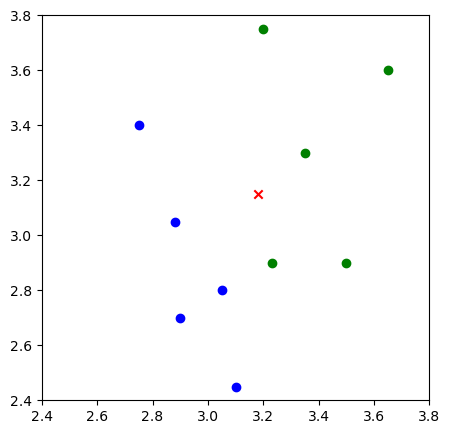

In [111]:
#### Classları renkli olarak grafikte görelim
plt.figure(figsize=(5,5))
plt.xlim(2.4,3.8)
plt.ylim(2.4,3.8)

#mevcut data

plt.scatter(x_df.iloc[:5,0],x_df.iloc[:5,1],c='b')
plt.scatter(x_df.iloc[5:,0],x_df.iloc[5:,1],c='g')

#tahmin etmek istediğimiz nokta  [3.18  3.15]
plt.scatter([3.18],[3.15],c='r',marker='x')

plt.show()

MESAFELERİN HESAPLANMASI

In [112]:
# Manhattan distance
# Euclidean distance 
# ML'de mesafe hesaplamak için bolca kullanılır

In [113]:
def manhattan(x,y):
    #manhattan distance
    
    d= np.sum(np.abs(x-y))
    
    return d


In [114]:
x = np.array([4,6])
print('x:',x)

y = np.array([2,8])
print('y',y)

d_man = manhattan(x,y)

print(d_man)



x: [4 6]
y [2 8]
4


Euclidean Distance

In [115]:
def euclidean(x,y):

    d = np.sqrt(np.sum(np.square(x-y)))
    return d




In [116]:
x = np.array([4,6])
print('x:',x)

y = np.array([2,8])
print('y',y)

d_euc = euclidean(x,y)

print(d_euc)

x: [4 6]
y [2 8]
2.8284271247461903


Karar Verme Kuralları

In [117]:
# Diyelimki tahmin noktamız için K adet en yakın komşu bulduk

# Bu tahmin noktasının hangi sınıfa ait olduğuna nasıl karar vereceğiz ? 

# 1- Çoğunluk yöntemi (sayıca en fazla olan kazanır)
# 2- Ağırlıklandırma yöntemi (sınıflara ağırlık verilerek oranlar hesaplanır)

In [118]:
# adetlere göre çoğunluk sıralaması yapan bir fonksiyon yapalım
import operator

def cogunluk_yöntemi(class_count):
    sorted_class_count = sorted(class_count.items(),key=operator.itemgetter(1),reverse=True)
    
    return sorted_class_count



In [119]:
arr = {'A':3,'B':2,'C':6,'D':5}

cogunluk_yöntemi(arr)

[('C', 6), ('D', 5), ('A', 3), ('B', 2)]

KNN'İN UYGULANIŞI

In [120]:
def knn(test_data,train_data,labels,k):
    
    #mesafeler için boş bir liste oluşturalım 
    distances = np.array([])
    
    #Euclidean distance için mesafeleri hesapla
    
    for each_data in train_data:
        d=euclidean(test_data,each_data)
        distances = np.append(distances,d)
        
    #mesafeleri sıralı ve sıralı indexleri al
    
    sorted_distance_index = distances.argsort()
    sorted_distance = np.sort(distances)
    
    
    # yarıçapı hesapla k-1 indexli eleman son elemandır
    
    r = (sorted_distance[k] + sorted_distance[k-1])/2
    
    
    class_count = {}
    
    # Çoğunluk yöntemi
    
    for i in range(k):
        vote_label = labels[sorted_distance_index[i]]
        class_count[vote_label] = class_count.get(vote_label,0) + 1
        
        
    # sınıf değeri yani seçilen label 
    
    final_label = cogunluk_yöntemi(class_count)
    
    return final_label,r

In [121]:
# tahmin noktası yani test datayı belirle
test_data = np.array([3.18,3.15])

# knn() fonksiyonunu çağıralım k = 5 için

final_label , r = knn(test_data,features,labels,5)

In [122]:
print(final_label)

[('B', 3), ('A', 2)]


In [123]:
print(r)

0.4517360073513873


SONUÇ GÖRSELLEŞTİRME

In [133]:
# K = 5 için elde ettiğimiz r  için bir çember çizelim

# polar cordinates  x = r*cosa  y = r*sina

def cember(r,a,b):
    theta = np.arange(0,2*np.pi,0.01)
    x =  a+r * np.cos(theta)
    y =  b+r * np.sin(theta)
    return x,y

In [134]:
k_circle_x, k_circle_y = cember(r,3.18,3.15)

In [135]:
k_circle_x

array([3.63173601, 3.63171342, 3.63164566, 3.63153274, 3.63137467,
       3.63117145, 3.63092313, 3.63062971, 3.63029122, 3.62990771,
       3.62947921, 3.62900576, 3.62848741, 3.62792421, 3.62731622,
       3.6266635 , 3.62596611, 3.62522413, 3.62443762, 3.62360667,
       3.62273136, 3.62181178, 3.62084802, 3.61984017, 3.61878834,
       3.61769263, 3.61655315, 3.61537002, 3.61414335, 3.61287326,
       3.61155989, 3.61020336, 3.60880382, 3.60736139, 3.60587623,
       3.60434848, 3.60277829, 3.60116583, 3.59951125, 3.59781473,
       3.59607642, 3.5942965 , 3.59247515, 3.59061256, 3.5887089 ,
       3.58676438, 3.58477918, 3.5827535 , 3.58068754, 3.57858152,
       3.57643564, 3.57425012, 3.57202517, 3.56976102, 3.5674579 ,
       3.56511602, 3.56273564, 3.56031699, 3.5578603 , 3.55536582,
       3.55283382, 3.55026452, 3.5476582 , 3.54501512, 3.54233554,
       3.53961972, 3.53686794, 3.53408047, 3.5312576 , 3.5283996 ,
       3.52550676, 3.52257937, 3.51961772, 3.51662211, 3.51359

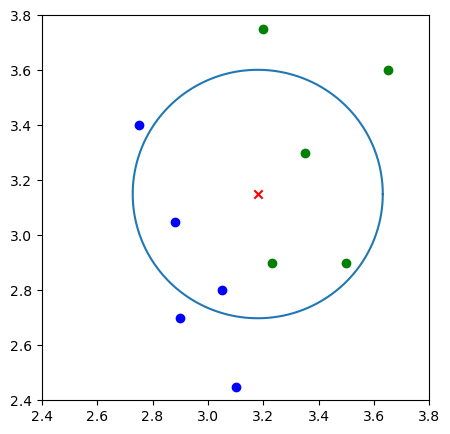

In [136]:
# classları renkli olarak grafikte görelim

plt.figure(figsize=(5,5))
plt.xlim((2.4,3.8))
plt.ylim((2.4,3.8))

# mevcut data

plt.scatter(x_df.iloc[:5,0],x_df.iloc[:5,1],c='b')
plt.scatter(x_df.iloc[5:,0],x_df.iloc[5:,1],c='g')

#tahmin etmek ist4ediğimiz  nokta 3.18 3.15

plt.scatter([3.18],[3.15],c='r',marker='x')

#çember

plt.plot(k_circle_x,k_circle_y)

plt.show()

In [ ]:
# Görüldüğü üzere K = 5 olduğu için en yakın 5 nokta içinde 3 yeşil  2 mavi var bu durumda yeşil olacaktır.

# Seçilen K değerinin çok büyük önemi vardır yani.